目次  
1.特徴量の説明  
2.前準備  
  
3.特徴量生成  
3.1.カテゴリー変数  
3.2.バイナリー変数  
3.3.数値変数  
  
４.主成分分析  
4.1.相関係数  
4.2.主成分分析（全量）  
4.3.主成分分析（顧客、アンダー・サンプリング）  
4.4.主成分分析（売上履歴、アンダー・サンプリング）  
4.5.分解変数  
  
5.特徴量の考察  
5.1.集計と傾向  
5.2.重要度  
5.4.各変数単体のAUC  
5.5.各特徴量の考察結果    

# 特徴量の説明

In [1]:
%%html
<style>table { float:left }</style>

<body>
<h2>既存の変数</h2>
    <table border="1" style='margin: 0 auto'>
    <p><b>顧客マスタ</b></p>
        <tr>
            <th>顧客コード</th>
            <th>性別</th>
            <th>郵便番号</th>
            <th>誕生日</th>
        </tr>
    </table><br>
    <table border="1" style='margin: 0 auto'>
    <p><b>売上履歴</b></p>
        <tr>
            <th>店舗コード</th>
            <th>レジNo</th>
            <th>レシートNo</th>
            <th>日付</th>
            <th>時間</th>
            <th>レシート行</th>
            <th>ジャンコード</th>
            <th>数量</th>
            <th>売単価</th>
            <th>値引</th>
            <th>販売金額</th>
            <th>原単価</th>
        </tr>
    </table><br>
    <table border="1" style='margin: 0 auto'>
    <p><b>商品マスタ</b></p>
        <tr>
            <th>JANCD</th>
            <th>部門</th>
            <th>大分類</th>
            <th>中分類</th>
            <th>小分類</th>
        </tr>
    </table><br>
</body>

<body>
<h2>使用する変数の分類</h2>
    <p><b>カテゴリー変数</b></p>
    <table style='margin: 0 auto'>
        <tr>
            <th>都道府県フラグ(0~1)</th>
            <th>市区町村フラグ(0~1)</th>
            <th>国コード</th>
            <th>月(1~10)</th>
            <th>曜日(0~6)</th>
            <th>レジNo(0~5)</th>
        </tr>
    </table><br>
    <table style='margin: 0 auto'>
    <p><b>バイナリ変数</b></p>
        <tr>
            <th>性別</th>
            <th>年齢グループ(0,1)</th>
            <th>買物可能フラグ</th>
            <th>売単価分類</th>
            <th>レシート行分類</th>
        </tr>
    </table><br>
    <table style='margin: 0 auto'>
    <p><b>数値変数</b></p>
        <tr>
            <th>顧客コード</th>
            <th>年齢</th>
            <th>日付時間</th>
            <th>ジャンコード</th>
            <th>レシートNo</th>
            <th>レシート行</th>
            <th>売上単価</th>
            <th>売単価</th>
            <th>原単価</th>
        </tr>
    </table>
    <table style='margin: 0 auto'>
        <tr>
            <th>数量</th>
            <th>販売金額</th>
            <th>値引</th>
            <th>来店回数</th>
            <th>移動距離</th>
            <th>移動時間</th>
            <th>メーカーコード</th>
            <th>商品コード</th>
            <th>チェックデジット</th>
        </tr>
    </table><br><br><br>
    <table style='margin: 0 auto'>
    <p><b>合成変数、交差項</b></p>
        <tr>
            <th>年齢グループ×性別</th>
            <th>移動距離×来店回数</th>
            <th>売単価分類×レシート行分類</th>
        </tr>
    </table>
</body>

- **レジNo**<br>
 　対象部門・分類の商品は、No.5のレジでの購買履歴がない。One hot Encodingとする<br>
- **来店回数、購買回数（商品）、購買回数（分類）**<br>
 　出現頻度を特徴量として扱う<br>
- **日付時間**<br>
 　日付、時間を統合する<br>
- **年齢**<br>
 　誕生日から逆算する<br>
- **売上単価**<br>
 　売単価-原単価<br>
- **都道府県フラグ、市区町村フラグ**<br>
 　郵便番号から割り出す<br>
 　都道府県、市区町村は四国以外は除外する。本データは店舗購入履歴のみであり、オンラインでもない限り買い物に来れないため<br>
 　都道府県、市区町村はOne Hotエンコーディングとする<br>
- **移動時間、移動距離**<br>
 　郵便番号から割り出す。Google APIを使用する<br>
 　店舗住所は、顧客の郵便番号の一番多い場所とする<br>
- **買物可能フラグ**<br>
 　四国以内:1、以外:0<br>
- **国コード、メーカーコード、商品コード、チェックデジット**<br>
 　ジャンコードを、国内外、メーカー、商品に分解する<br>
  
`返品レコードは除外する。1回は購入しているため`

<body>
    <h2>使用しない変数</h2>
        <table style='margin: 0 auto'>
            <tr>
                <th>店舗コード</th>
                <th>部門コード</th>
                <th>部門</th>
                <th>大分類</th>
                <th>中分類</th>
                <th>小分類</th>
                <th>郵便番号</th>
                <th>誕生日</th>
            </tr>
        </table><br>
</body><br>

`部門：門コードをほぼ同一であり、カンニングとなる`<br>
`郵便番号：都道府県、市区町村、移動距離、移動時間として保持する`<br>
`誕生日：年齢として保持する`<br>

# 前準備

In [2]:
from IPython.display import HTML
HTML('''<script>  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide code')
    }
    code_shown= !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script><form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show code"></form>''')
from IPython.display import Javascript, display
from ipywidgets import widgets
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
button= widgets.Button(description="Refresh")
button.on_click(run_all)
display(button)

Button(description='Refresh', style=ButtonStyle())

## ライブラリ・インポート、初期セットアップ

In [3]:
print("データ処理系")
import numpy as np
import pandas as pd
import collections
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print("描画系")
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.style as mplstyle
import japanize_matplotlib
mplstyle.use('fast')
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style(style='dark')

print("表示調整系")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
pd.options.display.float_format = '{:.0f}'.format
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["font.size"] = 10
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))
from tqdm import tqdm # プログレスバー表示用

データ処理系
描画系
表示調整系


## データ準備

In [4]:
print('データ取得')
items = pd.read_csv("./mst_items.csv")
customers = pd.read_csv("./mst_customers.csv")
sales_3121 = pd.read_csv("./sales_3121.csv")
sales_3122 = pd.read_csv("./sales_3122.csv");

データ取得


In [5]:
print('結合')
customers_sales = pd.merge(customers, sales_3121, on='顧客コード', how='left')
print('外部結合用にリネーム')
items_rename = items.rename(columns={'JANCD': 'ジャンコード'})
print('結合')
customers_sales_items = pd.merge(customers_sales, items_rename, on='ジャンコード', how='left')

print('返品情報を除外する')
over = customers_sales_items[customers_sales_items['数量']>=0]

print('売上履歴、商品マスタの紐づかないレコードは対象外とする')
positive = over[over['大分類'].notnull()]
zip_item = positive.copy()

print('郵便番号の「ハイフン（-）」を置換')
zip_item['郵便番号'] = positive['郵便番号'].str.replace('-','')

print('更新条件セット')
condition1 = zip_item['部門コード']==4
condition2 = zip_item['大分類']==11
condition3 = zip_item['中分類']==11
condition4 = zip_item['中分類']==2
condition_all = (condition1) & (condition2) & ((condition3 |condition4))

print('購入フラグの設定')
zip_item['購入フラグ']=1
target = zip_item.copy()
target['購入フラグ'] = zip_item['購入フラグ'].where((condition_all), 0)
df = target.reindex(columns=['購入フラグ', '顧客コード',  '性別', '郵便番号', '誕生日', 'レジNo', 'レシートNo','レシート行', '日付', '時間', 'ジャンコード', '数量', '売単価', '値引', '販売金額', '原単価'])
df.head(3);

結合
外部結合用にリネーム
結合
返品情報を除外する
売上履歴、商品マスタの紐づかないレコードは対象外とする
郵便番号の「ハイフン（-）」を置換
更新条件セット
購入フラグの設定


# 特徴量生成

## カテゴリー変数

### 都道府県フラグ

In [6]:
category = df.copy()

zipno=[]
zip_rome=[]
shi=[]
print('日本郵政の郵便番号・住所情報を取得')
with open('KEN_ALL_ROME.csv', 'rt', encoding='Shift_JIS') as fp:
    reader = csv.reader(fp)
    for row in reader:
        zipno.append(row[0])
        zip_rome.append(row[1])
        shi.append(row[2])

zip_ = pd.DataFrame()
zip_['郵便番号'] = zipno
zip_['都道府県'] = zip_rome
zip_['市区町村'] = shi
zip_.sort_values(by='郵便番号').head(3)

df_zip = pd.DataFrame()
df_zip = pd.merge(category, zip_, on='郵便番号', how='left')
df_zip[['顧客コード', '郵便番号', '都道府県', '市区町村']].tail(3)

日本郵政の郵便番号・住所情報を取得


,郵便番号,都道府県,市区町村
89,0010000,北海道,札幌市 北区
100,0010010,北海道,札幌市 北区
102,0010011,北海道,札幌市 北区


,顧客コード,郵便番号,都道府県,市区町村
394879,2040000900087,7810312,高知県,高知市
394880,2040000900112,7815701,高知県,安芸郡 芸西村
394881,2040000900131,7810313,高知県,高知市


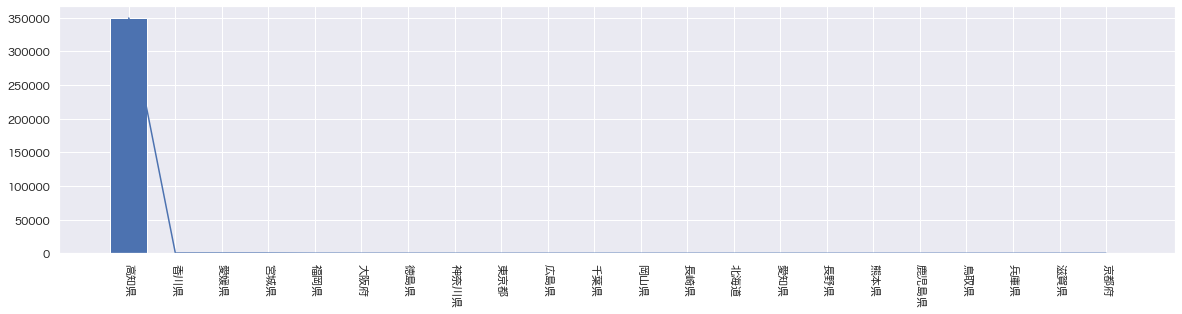

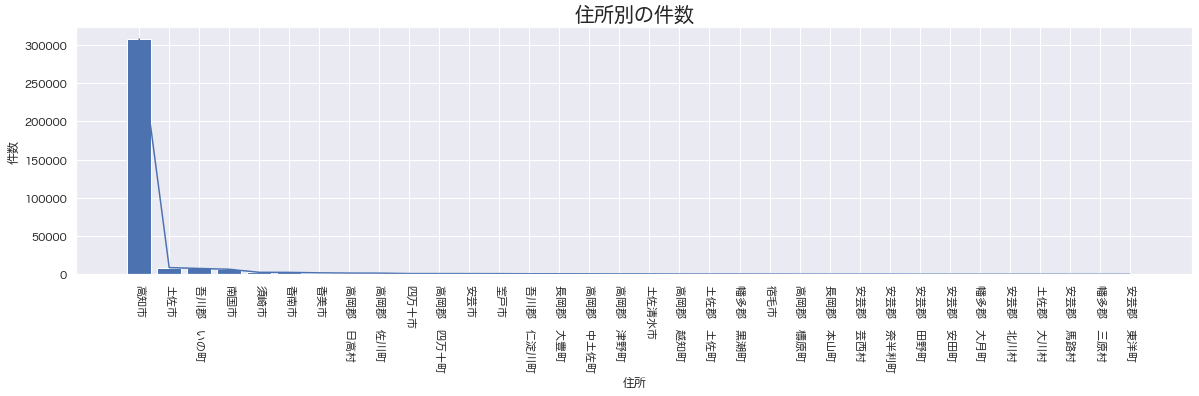

In [7]:
x1 = df_zip['都道府県'].value_counts().index
y1 = df_zip['都道府県'].value_counts().values
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.xticks(rotation=-90)
plt.bar(x1, y1)
plt.plot(x1, y1)
plt.grid()

x2 = df_zip[df_zip['都道府県']=='高知県']['市区町村'].value_counts().index
y2 = df_zip[df_zip['都道府県']=='高知県']['市区町村'].value_counts().values
plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
plt.xticks(rotation=-90)
plt.title('住所別の件数', fontsize=20)
plt.xlabel('住所')
plt.ylabel('件数')
plt.bar(x2, y2)
plt.plot(x2, y2)
plt.grid()
ｐｌｔ.show();

In [8]:
zip_df = df_zip.copy()
zip_df['都道府県'] = df_zip['都道府県'].fillna('高知県')
zip_df['市区町村'] = df_zip['市区町村'].fillna('高知市')

ken = zip_df.copy()
ken['都道府県フラグ'] = 0
kens = ['高知県', '香川県', '愛媛県', '徳島県']
condition =zip_df['都道府県'].isin(kens)
ken['都道府県フラグ'] = zip_df.where(~condition, 1)

num0 = ken[ken['都道府県フラグ']==0]['都道府県フラグ'].shape[0]
num1 = ken[ken['都道府県フラグ']==1]['都道府県フラグ'].shape[0]
print(f'合計：{len(ken)}')
print(f'四国以外：{ num0 }')
print(f'四国以内：{ num1 }');

合計：394882
四国以外：672
四国以内：394210


### 国コード（2桁）

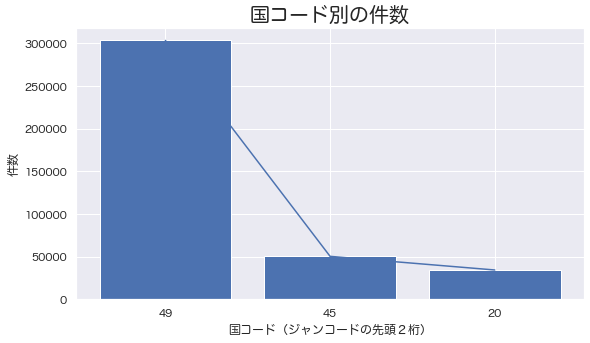

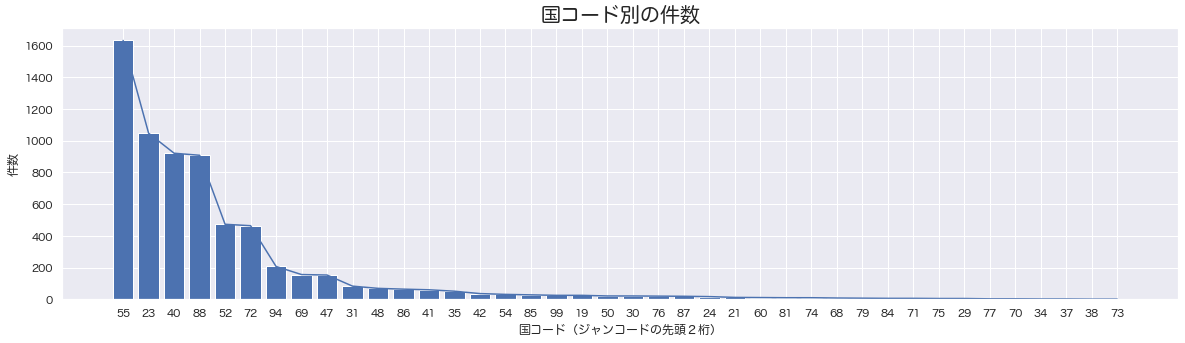

In [9]:
country = ken.copy()
country['国コード'] = country['ジャンコード'].astype('str').str[:2].astype('int')

base = country['国コード'].value_counts()
country['国コード'].value_counts().shape[0]
country_ranking = pd.DataFrame()
country_ranking['国コード'] = base.index
country_ranking['出現回数'] = base.values
country_ranking['順位'] = country_ranking.index + 1

top3_country = country_ranking.sort_index()[:3]
x1 = top3_country['国コード'].astype('str')
y1 = top3_country['出現回数'].values
plt.subplot(1,2,1)
plt.title('国コード別の件数', fontsize=20)
plt.xlabel('国コード（ジャンコードの先頭２桁）')
plt.ylabel('件数')
plt.bar(x1, y1)
plt.plot(x1, y1)
plt.grid()
plt.show();

minority_country = country_ranking.sort_index()[3:]
x2 = minority_country['国コード'].astype('str')
y2 = minority_country['出現回数'].values
plt.title('国コード別の件数', fontsize=20)
plt.xlabel('国コード（ジャンコードの先頭２桁）')
plt.ylabel('件数')
plt.bar(x2, y2)
plt.plot(x2, y2)
plt.grid()
plt.show();

#### ラベル・エンコーディング（国コード）

In [10]:
le = LabelEncoder()
encoded_ken = le.fit_transform(country['国コード'].values)
country['国コード'] = encoded_ken
country[['顧客コード', 'ジャンコード', '国コード']].head(2);

### 月、曜日

時間情報のインデックスが必要な為、日付時間項目生成後に、作成する  
3.4 カテゴリー変数を参照  

### レジNo

#### One hot エンコーディング（レジNo1~5）

In [11]:
regi = country.copy()
regi['レジNo'] = regi['レジNo'].astype(int)
regi = pd.get_dummies(regi, columns=['レジNo'], prefix='レジNo', prefix_sep='.')
regi[['顧客コード', 'レジNo.1', 'レジNo.2', 'レジNo.3', 'レジNo.4', 'レジNo.5']].head(2);

## バイナリ変数

### 誕生日

#### 欠損値補完

In [12]:
birthday = regi.copy()
condition = birthday['誕生日'].isnull()
birthday['誕生日'] = birthday['誕生日'].where(~condition , birthday['誕生日'].mean())
birthday[birthday['誕生日'].notnull()][['顧客コード', '誕生日']].head(2);

### 年齢グループ

In [13]:
age = birthday.copy()
print('誕生日==0(未入力), 2040（誤り）のデータを置換する')
condition1 = (age['誕生日'] < 1)
condition2 = (age['誕生日'] > 2020)
age['誕生日'] = age['誕生日'].where(~condition1, age['誕生日'].median())
age['誕生日'] = age['誕生日'].where(~condition2, age['誕生日'].median())

print('年齢')
year = 2020
age['年齢'] = year - age['誕生日']

print('年齢グループ')
print('0:0~39歳 or 80歳~, 1:40~79歳')
condition3 = (age['年齢']>=40) & (age['年齢']<80)
age['年齢グループ'] = 0
age['年齢グループ'] = age.where(~condition3, 1)
age[['顧客コード', '誕生日', '年齢', '年齢グループ']].head(2);

誕生日==0(未入力), 2040（誤り）のデータを置換する
年齢
年齢グループ
0:0~39歳 or 80歳~, 1:40~79歳


### 買物可能フラグ

In [14]:
sale_flg = age.copy()
sale_flg['買物可能フラグ'] = 0
shikoku = ['高知県', '愛媛県', '香川県', '徳島県']
condition = sale_flg['都道府県'].isin(shikoku)
sale_flg['買物可能フラグ'] = sale_flg.where(~condition, 1)

base = sale_flg['買物可能フラグ'].value_counts()
table = pd.DataFrame(base.values, base.index)
table

,0
1,394210
0,672


#### ラベル・エンコーディング（都道府県）

In [15]:
encode = sale_flg.copy()
le = LabelEncoder()
encoded_ken = le.fit_transform(encode['都道府県'].values)
encoded_shi = le.fit_transform(encode['市区町村'].values)
encode['都道府県'] = encoded_ken
encode['市区町村'] = encoded_shi
encode[['顧客コード', '都道府県', '市区町村']].head(2);

### 売単価分類

In [16]:
print('売単価分類を生成')
sales_unit = encode.copy()
sales_unit['売単価分類'] = 0
sales_unit['売単価分類'] = sales_unit.where(~(sales_unit['売単価']<75000), 1)

base = sales_unit['売単価分類'].value_counts()
table = pd.DataFrame(base.values, base.index)
table

売単価分類を生成


,0
1,394871
0,11


### レシート行分類

In [17]:
print('レシート行分類を生成')
receipt = sales_unit.copy()
receipt['レシート行分類'] = 0
receipt['レシート行分類'] = receipt.where(~(sales_unit['レシート行']<20), 1)

base = receipt['レシート行分類'].value_counts()
table = pd.DataFrame(base.values, base.index)
table

レシート行分類を生成


,0
1,394363
0,519


## 数値変数

### 年齢

3.2.1  年齢グループ で作成済み

### 日付時間

In [18]:
datetime = receipt.copy()
datetime['時間'] = receipt['時間'].astype(int).astype(str)
list = []
for index in tqdm(datetime.index):
    if (len(datetime['時間'][index])<4):
        list.append(datetime['時間'][index].zfill(4))
    else:
        list.append(datetime['時間'][index])
datetime['時間'] = list

print("時間項目を4桁の固定長に変換");

100%|██████████| 394882/394882 [00:06<00:00, 59975.77it/s]

時間項目を4桁の固定長に変換


In [19]:
print('日付時間をインデックスに設定')
datetime["日付時間"] = pd.to_datetime( datetime['日付'].astype(int).astype(str).str.cat( [datetime['時間']], sep=' ') )
datetime.sort_values(by=['日付', '時間'])[['顧客コード', '日付', '時間', '日付時間']].head(2);

日付時間をインデックスに設定


### 売上単価

In [20]:
print('売単価 - 原単価')
sales_unit = datetime.copy().sort_values(by='日付時間')
sales_unit['売上単価'] = sales_unit['売単価'] - sales_unit['原単価']
sales_unit[['顧客コード', '売単価', '原単価', '売上単価']].head(2);

売単価 - 原単価


### 来店回数

In [21]:
visit = sales_unit.copy()
visit_group = visit.groupby(['日付時間', '顧客コード'])[['顧客コード']].count()
visit_group['顧客コード'] = 1
visit_group = visit_group.rename(columns={'顧客コード': '基礎値'})
visit_group['来店回数'] = visit_group.groupby('顧客コード').cumsum()['基礎値']

print('1日ごとにカウントして、来店回数を算出する')
visit_group.reset_index(inplace= True)
visit_group = visit_group.drop('基礎値', axis=1)
visit_group.tail(2);

1日ごとにカウントして、来店回数を算出する


In [22]:
sales_join = sales_unit.copy()
sales_join = pd.merge(sales_join, visit_group, on=['日付時間', '顧客コード'], how='left')
sales_join[['顧客コード', '日付時間', '来店回数']].tail(2);

### 移動距離、移動時間

郵便番号の上位１０件を表示


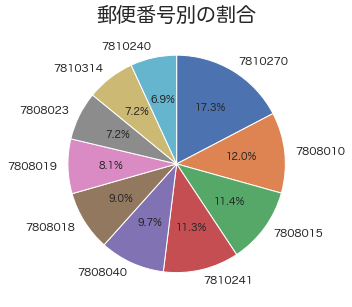

In [23]:
distance = sales_join.copy()
print('郵便番号の上位１０件を表示')
value_counts = distance['郵便番号'].value_counts()
majority_zip = value_counts[:10]
labels = majority_zip.index

plt.figure(figsize=(15,5))
plt.title('郵便番号別の割合', fontsize=20)
plt.pie(value_counts[:10], labels=labels, autopct="%1.1f%%", startangle=90, counterclock=False);

#### WebAPIによる移動距離、時間の取得

In [24]:
import json
import urllib

zips = distance['郵便番号'].copy()
api_key = 'ここにAPI_keyをセット'
shop_zip = zips.mode().values[0]
zip_to = shop_zip

print("お金掛かるのであまり実行しないこと")
# zip_list = []
# distance_list = []
# duration_list = []
# unique_zips = zips.unique()
# for zip_from in tqdm(unique_zips):
#     url = f'https://maps.googleapis.com/maps/api/directions/json?origin={zip_from}&destination={zip_to}&key={api_key}'
#     response = urllib.request.urlopen(url)
#     body = json.load(response)

#     if (body['routes']):
#         zip_list.append(zip_from)
#         distance_list.append(body['routes'][0]['legs'][0]['distance']['value'])
#         duration_list.append(body['routes'][0]['legs'][0]['duration']['value'])
#     else: # 取得できなかった場合
#         zip_list.append(zip_from)
#         distance_list.append(-1)
#         duration_list.append(-1)

# zip_list_df = pd.DataFrame()
# zip_list_df['郵便番号'] = zip_list
# zip_list_df['移動距離'] = distance_list
# zip_list_df['移動時間'] = duration_list
# zip_list_df.head(2)

# zip_list_df.to_csv('./zip_list_df.csv', encoding="UTF-8", header=True, index=True)

お金掛かるのであまり実行しないこと


#### 欠損値補完

In [25]:
distance_duration = pd.read_csv('./zip_list_df.csv')

print('[不明：-1]を、移動距離・移動時間の中央値で補完する')
zip_df = distance_duration.copy()
zip_df['郵便番号'] = zip_df['郵便番号'].astype(str)
distances = zip_df['移動距離']
durations = zip_df['移動時間']
distances_median = distances.median()
durations_median = durations.median()
zip_df['移動距離'] = zip_df['移動距離'].astype(str)
zip_df['移動時間'] = zip_df['移動時間'].astype(str)
zip_df['移動距離'] = zip_df['移動距離'].replace('-1' , str(int(distances_median)))
zip_df['移動時間'] = zip_df['移動時間'].replace('-1' , str(int(durations_median)))

print('移動距離・移動時間を結合')
movement = distance.copy()
movement = pd.merge(movement, zip_df, on='郵便番号', how='left')

print('欠損値補完')
condition1 = (movement['移動距離'].isnull())
condition2 = (movement['移動時間'].isnull())
movement['移動距離'] = movement['移動距離'].where(~condition1 , movement['移動距離'].median())
movement['移動時間'] = movement['移動時間'].where(~condition2 , movement['移動時間'].median())
movement[movement['誕生日'].notnull()][['顧客コード', '移動距離', '移動時間']].head(2);

[不明：-1]を、移動距離・移動時間の中央値で補完する
移動距離・移動時間を結合
欠損値補完


### 月、曜日

In [26]:
print('曜日のOneHotエンコーディング')
day_week = movement.copy()
datetime = day_week['日付時間']
weeks = []
for index in tqdm(day_week.index):
    weeks.append(datetime[index].strftime('%A'))
day_week['曜日'] = weeks
day_week = pd.get_dummies(day_week, columns=['曜日'], prefix='', prefix_sep='')
day_week[['日付時間', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].head(2);

  1%|          | 2928/394882 [00:00<00:13, 29277.38it/s]

曜日のOneHotエンコーディング


100%|██████████| 394882/394882 [00:08<00:00, 45219.81it/s]


In [27]:
print('日付時間項目生成')
day_week["日付時間"] = day_week['日付'].astype(int).astype(str).str.cat( [day_week['時間']], sep='')
day_week.sort_values(by=['日付', '時間'])[['日付', '時間', '日付時間']].head(2);

日付時間項目生成


## 分解変数

### ジャンコード（国コード、メーカーコード、アイテムコード）

 ~ ジャンコードのパターン ~   
- 5桁 ： アイテムコード5桁    
  
- 8桁（JAN-8） ： 国2桁 ＋ メーカー4桁 ＋ アイテムコード1桁 ＋ チェックデジット1桁  
  
- 9桁 ： 国2桁 ＋ メーカー7桁    
  
- 11桁 ： UPCA-12のC/Dを含まないコード  

- 12桁（UPCA-12）（※注）先頭0の13桁は、UPCA-12扱い  
　　NS=0,2,5,6,7 ： NS１桁 ＋ メーカー桁5 ＋ アイテム桁5 ＋ C/D1桁    
　　NS=1,8,9 ： NS１桁 ＋ メーカー桁7 ＋ アイテム3桁 ＋ C/D1桁        
    
- 13桁（EAN-13/JAN-13）  
　　先頭が456~459 ： 国2桁 ＋ メーカー5桁 ＋ アイテムコード5桁 ＋ チェックデジット1桁    
　　先頭が45,49の上記以外 ： 国2桁 ＋ メーカー7桁 ＋ アイテムコード3桁 ＋ チェックデジット1桁    
※分類不明の商品は全てWebAPIから商品属性を確認したが、該当の商品分類に属さないことが確認できた為、目的変数は0を設定する。    

In [28]:
feature_eng = day_week.copy()

jancd_list=[]
jancd_len_list=[]
lead_num_list = []
jan_county_code_list = []
jan_maker4_list = []
jan_maker5_list = []
jan_maker7_list = []
jan_item1_list = []
jan_item3_list = []
jan_item5_list = []

ns_code_list = []
ns1_maker5_list = []
ns1_item5_list = []
ns2_maker7_list = []
ns2_item3_list = []
cd_list = []
for value in tqdm(feature_eng['ジャンコード'].astype(int).astype(str).values):
    jancd_list.append(value)
    jancd_len_list.append(len(value))
    lead_num_list.append(value[:3])
    # JAN/EANコード
    jan_county_code_list.append(value[:2])
    jan_maker4_list.append(value[2:6])
    jan_maker5_list.append(value[2:7])
    jan_maker7_list.append(value[2:9])
    jan_item1_list.append(value[6:7])
    jan_item3_list.append(value[9:12])
    jan_item5_list.append(value[7:12])
    # UPCコード
    ns_code_list.append(value[:1])
    ns1_maker5_list.append(value[1:6])
    ns1_item5_list.append(value[6:11])
    ns2_maker7_list.append(value[1:8])
    ns2_item3_list.append(value[8:11])
    # 共通
    cd_list.append(value[-1:])
    
jancd_df = pd.DataFrame()
jancd_df["ジャンコード"] = jancd_list
jancd_df["桁数"] = jancd_len_list
jancd_df["先頭数字"] = lead_num_list
# JAN/EANコード
jancd_df["国CODE"] = jan_county_code_list
jancd_df["メーカーコード4桁"] = jan_maker4_list
jancd_df["メーカーコード5桁"] = jan_maker5_list
jancd_df["メーカーコード7桁"] = jan_maker7_list
jancd_df["アイテムコード1桁"] = jan_item1_list
jancd_df["アイテムコード3桁"] = jan_item3_list
jancd_df["アイテムコード5桁"] = jan_item5_list
# UPCコード
jancd_df["NS"] = ns_code_list
jancd_df["NS1_メーカーコード5桁"] = ns1_maker5_list
jancd_df["NS1_アイテムコード5桁"] = ns1_item5_list
jancd_df["NS2_メーカーコード7桁"] = ns2_maker7_list
jancd_df["NS2_アイテムコード3桁"] = ns2_item3_list
# 共通
jancd_df["C/D"] = cd_list
jancd_df.head()

100%|██████████| 394882/394882 [00:04<00:00, 92246.67it/s] 


,ジャンコード,桁数,先頭数字,国CODE,メーカーコード4桁,メーカーコード5桁,メーカーコード7桁,アイテムコード1桁,アイテムコード3桁,アイテムコード5桁,NS,NS1_メーカーコード5桁,NS1_アイテムコード5桁,NS2_メーカーコード7桁,NS2_アイテムコード3桁,C/D
0,4906161005723,13,490,49,0616,06161,0616100,1,572,00572,4,90616,10057,9061610,057,3
1,2010101066520,13,201,20,1010,10101,1010106,1,652,06652,2,01010,10665,0101010,665,0
2,4954730664369,13,495,49,5473,54730,5473066,0,436,66436,4,95473,06643,9547306,643,9
3,4940560001351,13,494,49,4056,40560,4056000,0,135,00135,4,94056,00013,9405600,013,1
4,4938960013432,13,493,49,3896,38960,3896001,0,343,01343,4,93896,00134,9389600,134,2


In [29]:
print("重複行を削除")
jancd_ = jancd_df.copy()
jancd_  = jancd_df.drop_duplicates()

print("ジャンコード情報を追加")
feature_eng["ジャンコード"] = feature_eng["ジャンコード"].astype(int).astype(str)
feature = feature_eng.copy()
feature = pd.merge(feature_eng, jancd_, on='ジャンコード', how='left')
feature.head(2)

重複行を削除
ジャンコード情報を追加


,購入フラグ,顧客コード,性別,郵便番号,誕生日,レシートNo,レシート行,日付,時間,ジャンコード,...,メーカーコード7桁,アイテムコード1桁,アイテムコード3桁,アイテムコード5桁,NS,NS1_メーカーコード5桁,NS1_アイテムコード5桁,NS2_メーカーコード7桁,NS2_アイテムコード3桁,C/D
0,0,10506982644,1,7808015,1942,6622,2,20190401,0644,4906161005723,...,0616100,1,572,00572,4,90616,10057,9061610,057,3
1,0,10506982644,1,7808015,1942,6622,1,20190401,0644,2010101066520,...,1010106,1,652,06652,2,01010,10665,0101010,665,0


In [30]:
# 分解

# 主成分分析

## 相関係数

相関係数
描画


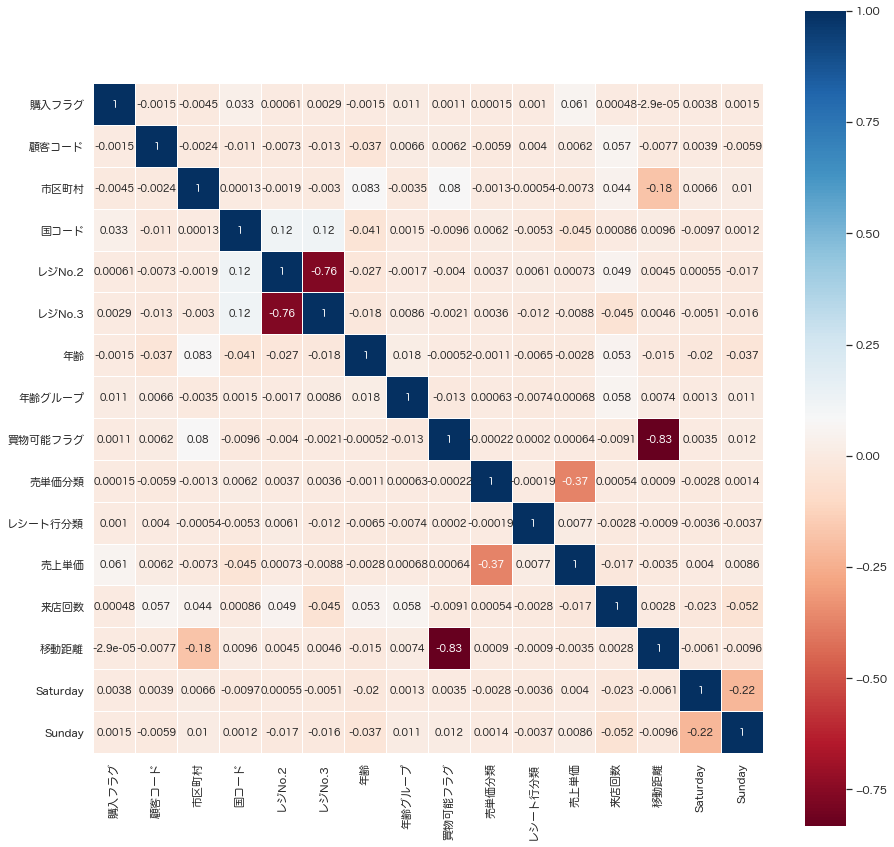

In [31]:
print('相関係数')
# principal = feature.copy()
principal = day_week.copy()
principal = principal.drop(columns='Unnamed: 0', axis=0)
principal = principal.astype(float)

columns = ['購入フラグ', '顧客コード', '市区町村', '国コード', 'レジNo.2', 'レジNo.3', '年齢', '年齢グループ', '買物可能フラグ', '売単価分類', 'レシート行分類', '売上単価', '来店回数', '移動距離', 'Saturday', 'Sunday']
corr = principal[columns].corr()

print('描画')
plt.figure(figsize=(15, 15))
colormap = plt.cm.RdBu
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

## 主成分分析（関数の定義）

In [32]:
print('主成分分析、主成分得点')
def principal_analisis(column):
    print('前準備')
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA,TruncatedSVD
    principal_u = day_week.copy()
    principal_u = principal_u.astype(float)

    print("不均衡データのため、負例データのアンダー・サンプリングを実施する")
    from imblearn.under_sampling import RandomUnderSampler
    target = '購入フラグ'
    rs=RandomUnderSampler(random_state=42)
    df_sample_u, _=rs.fit_resample(principal_u, principal_u[target])
    df_sample_u = df_sample_u[column]

    print('標準化')
    standard_u = df_sample_u.iloc[:, 0:].apply(lambda x: ((x-x.mean())/x.std()).round(decimals=3).astype(str), axis=0)

    print('主成分分析の実行')
    pca = PCA()
    pca.fit(standard_u)

    print('データを主成分空間に描画')
    feature_u = pca.transform(standard_u)
    pd.DataFrame(feature_u.round(decimals=3).astype(str), columns=["PC{}".format(x + 1) for x in range(len(standard_u.columns))]).head(2)
    pd.DataFrame(feature_u.round(decimals=3).astype(str), columns=["PC{}".format(x) for x in standard_u.columns ]).head(2)

    print('簡易版でプロット')
    plt.figure(figsize=(6, 6))
    plt.scatter(feature_u[:, 0], feature_u[:, 1], alpha=0.3, c=df_sample_u.iloc[:, 0].tolist())
    plt.grid()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    return standard_u, pca

主成分分析、主成分得点


In [33]:
print('寄与率、累積寄与率')
def contribute_rate(standard, pca):
    print('寄与率')
    contribution = pd.DataFrame()
    contribution['寄与率'] = pca.explained_variance_ratio_.round(decimals=3).astype(str)
    contribution.index=["PC_{}".format(x) for x in standard.columns]

    print('累積寄与率をプロット')
    import matplotlib.ticker as ticker
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot([0] + np.cumsum(pca.explained_variance_ratio_).tolist(), "-o")
    plt.xlabel("主成分数")
    plt.ylabel("累積寄与率")
    plt.grid()
    plt.show()
    
    return contribution

寄与率、累積寄与率


In [34]:
print('因子分析')
def factor_analysis(standard, pca):
    print('因子分析')
    factor = pd.DataFrame()
    print('固有値')
    factor['第一主成分'] = pca.components_[0].round(decimals=3).astype(str)
    factor['第ニ主成分'] = pca.components_[1].round(decimals=3).astype(str)
    factor['カラム名'] = standard.columns[0:].astype(str)
    plot_factor = factor.sort_values(by='第一主成分', ascending=True)
    firsts = plot_factor['第一主成分']
    sedonds = plot_factor['第ニ主成分']
    cols = plot_factor['カラム名']

    print('プロット')
    i = 0
    plt.figure(figsize=(5, 5))
    for col in standard.columns:
        plt.text(firsts[i], sedonds[i], cols[i])
        i = i+1
    plt.scatter(firsts, sedonds, alpha=0.5)
    plt.grid()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
    return factor

因子分析


In [35]:
print('固有値、固有ベクトル')
def eigenvalue(standard, pca):
    print('PCA の固有値')
    df_eigen = pd.DataFrame(pca.explained_variance_.round(decimals=3).astype(str), index=["PC_{}".format(x) for x in standard.columns])
    print('PCA の固有ベクトル')
    df_eigen_vector = pd.DataFrame(pca.components_.round(decimals=3).astype(str), index=["PC_{}".format(x) for x in standard.columns])
    
    return df_eigen, df_eigen_vector

固有値、固有ベクトル


## 主成分分析（全量）

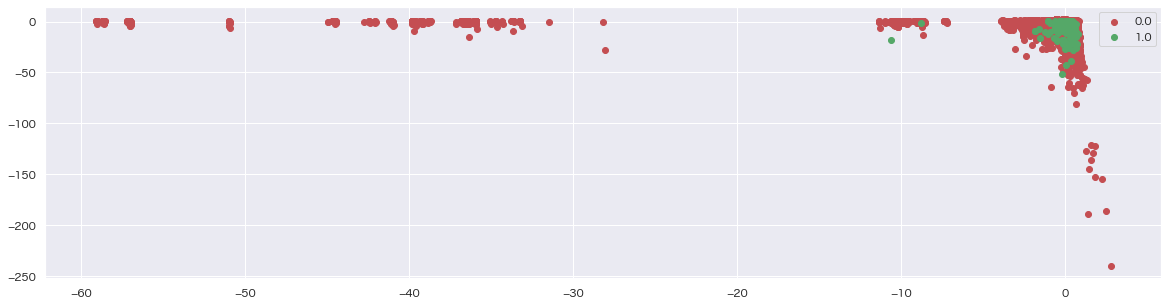

In [36]:
from itertools import zip_longest

# PCAクラス
class PCA:
    def __init__(self):
           pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        X = (X - X.mean(axis=0)) / X.std(axis=0) # 標準化
        R = np.corrcoef(X.T) # 相関行列
        eigvals, eigvecs = np.linalg.eigh(R) # 固有値分解(固有値と固有ベクトル)
        # 2次元に圧縮、特徴変換行列を作成
        W = np.c_[eigvecs[:, -1], eigvecs[:, -2]]
        self.vec = eigvecs
        self.data = X.dot(W)

X = principal.drop(["購入フラグ"], axis=1)
y = principal["購入フラグ"]
clf = PCA()
clf.fit(X, y)

X_pca = clf.data
colors = ["r", "g"]

for label, color in  zip(y.unique(), colors):
    # 横軸(第一引数)はX_pcaの0列目
    # 縦軸(第二引数)はX_pcaの1列目
    plt.scatter(X_pca.loc[y == label, 0], X_pca.loc[y == label, 1], c=color, label=label)
plt.legend()
plt.grid()
plt.show();

主成分をプロット


PCA()

寄与率
累積寄与率をプロット


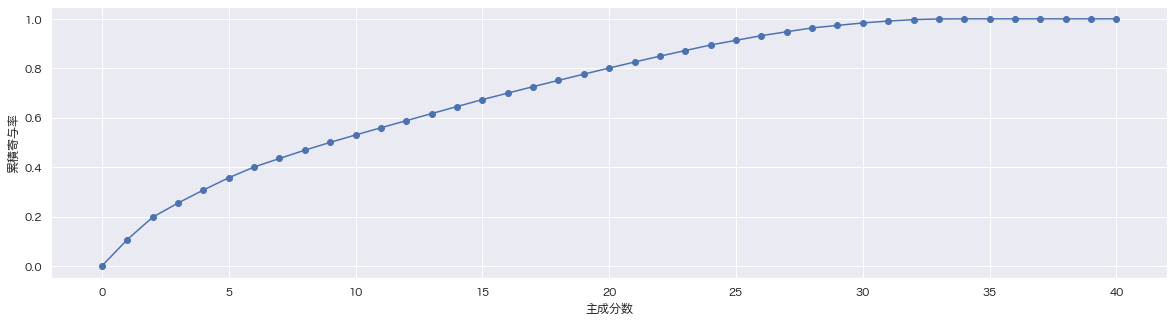

,寄与率
PC_顧客コード,0.107
PC_性別,0.09
PC_郵便番号,0.057
PC_誕生日,0.053
PC_レシートNo,0.05
PC_レシート行,0.043
PC_日付,0.035
PC_時間,0.034
PC_ジャンコード,0.032
PC_数量,0.03


In [69]:
print("主成分をプロット")
from sklearn.decomposition import PCA

X = principal.drop(["購入フラグ"], axis=1)
y = principal["購入フラグ"]
principal_std = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA()
pca.fit(principal_std)

contribution = contribute_rate(principal_std, pca)
contribution

In [73]:
print("次元圧縮結果を格納")
feature_pca = pca.fit_transform(principal_std)
principal_result = pd.DataFrame()
principal_result["購入フラグ"] = principal["購入フラグ"]
principal_result["第1主成分"] = feature_pca[:, 0].round(decimals=3).astype(str)
principal_result["第2主成分"] = feature_pca[:, 1].round(decimals=3).astype(str)
principal_result["第3主成分"] = feature_pca[:, 2].round(decimals=3).astype(str)
principal_result["第4主成分"] = feature_pca[:, 3].round(decimals=3).astype(str)
principal_result["第5主成分"] = feature_pca[:, 4].round(decimals=3).astype(str)
principal_result["第6主成分"] = feature_pca[:, 5].round(decimals=3).astype(str)
principal_result["第7主成分"] = feature_pca[:, 6].round(decimals=3).astype(str)
principal_result["第8主成分"] = feature_pca[:, 7].round(decimals=3).astype(str)
principal_result["第9主成分"] = feature_pca[:, 8].round(decimals=3).astype(str)
principal_result["第10主成分"] = feature_pca[:, 9].round(decimals=3).astype(str)
principal_result["第11主成分"] = feature_pca[:, 10].round(decimals=3).astype(str)
principal_result["第12主成分"] = feature_pca[:, 11].round(decimals=3).astype(str)
principal_result["第13主成分"] = feature_pca[:, 12].round(decimals=3).astype(str)
principal_result["第14主成分"] = feature_pca[:, 13].round(decimals=3).astype(str)
principal_result["第15主成分"] = feature_pca[:, 14].round(decimals=3).astype(str)
principal_result["第16主成分"] = feature_pca[:, 15].round(decimals=3).astype(str)
principal_result["第17主成分"] = feature_pca[:, 16].round(decimals=3).astype(str)
principal_result["第18主成分"] = feature_pca[:, 17].round(decimals=3).astype(str)
principal_result["第19主成分"] = feature_pca[:, 18].round(decimals=3).astype(str)
principal_result["第20主成分"] = feature_pca[:, 19].round(decimals=3).astype(str)
principal_result.shape
principal_result.head(2)

次元圧縮結果を格納


(394882, 21)

,購入フラグ,第1主成分,第2主成分,第3主成分,第4主成分,第5主成分,第6主成分,第7主成分,第8主成分,第9主成分,...,第11主成分,第12主成分,第13主成分,第14主成分,第15主成分,第16主成分,第17主成分,第18主成分,第19主成分,第20主成分
0,0,-0.253,-0.27,0.815,-0.756,-2.182,1.125,0.866,-0.342,-0.308,...,1.316,-1.609,-1.152,-0.198,1.567,0.347,0.606,0.395,-0.544,0.423
1,0,-0.331,-0.68,3.739,-0.156,-0.166,1.223,0.814,-0.461,-0.552,...,1.395,-1.697,-1.103,-0.218,1.325,0.721,0.093,-1.111,-0.04,0.46


In [74]:
principal_result.to_csv("./principal.csv", encoding="UTF-8", header=True, index=True);

#### 考察

全項目を対象とした場合、主成分が２０個で累積寄与率が全体の８０％となり、各変数の独立性は高そう。  
第２０成分までを抽出し、学習させてみる。  

## 主成分分析（顧客、アンダー・サンプリング）

In [40]:
print('項目設定')
column = [
  '購入フラグ', '性別', '郵便番号', '誕生日', '市区町村', '来店回数', '移動距離','Saturday', 'Sunday'
]

項目設定


前準備
不均衡データのため、負例データのアンダー・サンプリングを実施する
標準化
主成分分析の実行
データを主成分空間に描画
簡易版でプロット


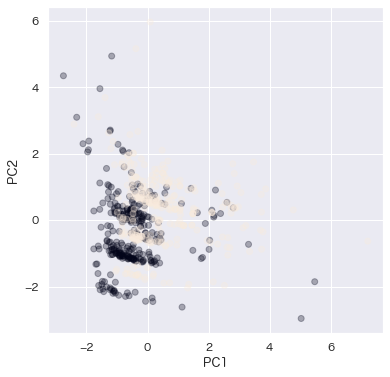

,購入フラグ,性別,郵便番号,誕生日,市区町村,来店回数,移動距離,Saturday,Sunday
0,-0.999,-0.776,0.065,-0.188,0.322,-0.629,0.704,1.998,-0.51
1,-0.999,1.204,0.076,1.431,0.322,-0.629,0.704,-0.5,-0.51


In [41]:
standard_u, pca = principal_analisis(column)
standard_u.head(2)

寄与率
累積寄与率をプロット


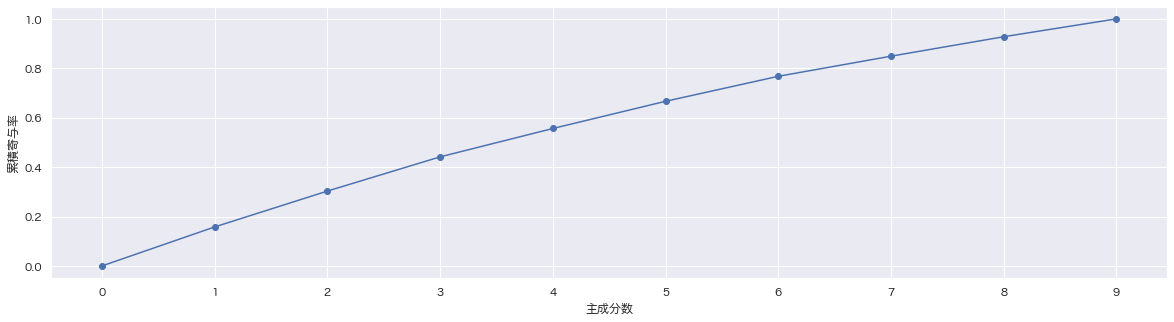

,寄与率
PC_購入フラグ,0.158
PC_性別,0.145
PC_郵便番号,0.138
PC_誕生日,0.115
PC_市区町村,0.11
PC_来店回数,0.101
PC_移動距離,0.081
PC_Saturday,0.079
PC_Sunday,0.072


In [42]:
contribution = contribute_rate(standard_u, pca)
contribution

### 考察

項目を顧客情報を中心に絞った結果、第６成分で累積寄与率が８０％となり、４つに分類できそうに見える。  
ただ第２成分までで、顧客を３つに分類して説明ができそうである。  
第１主成分：性別、第２主成分：郵便番号  
性別と住所、特に住所で分類できるように見える。  

目的変数（購入フラグ）を含む場合、第１主成分：購入フラグ、第２主成分：性別となり、  
3部類できるが、2つのグループに数が集中している。未登録、不明なども含んでいるためと思われる。  

## 主成分分析（売上履歴・アンダーサンプリング）

In [43]:
print('項目設定')
column = [
#     '購入フラグ', 
    '原単価', '売単価', '売上単価', '販売金額', '数量', '値引']

項目設定


前準備
不均衡データのため、負例データのアンダー・サンプリングを実施する
標準化
主成分分析の実行
データを主成分空間に描画
簡易版でプロット


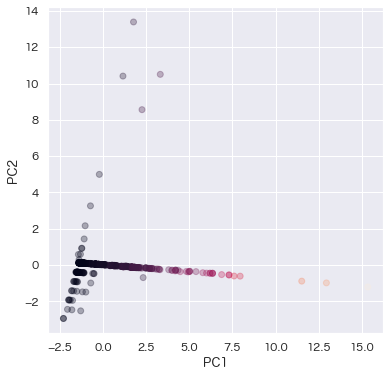

In [44]:
standard_u, pca = principal_analisis(column)
standard_u.head(2);

寄与率
累積寄与率をプロット


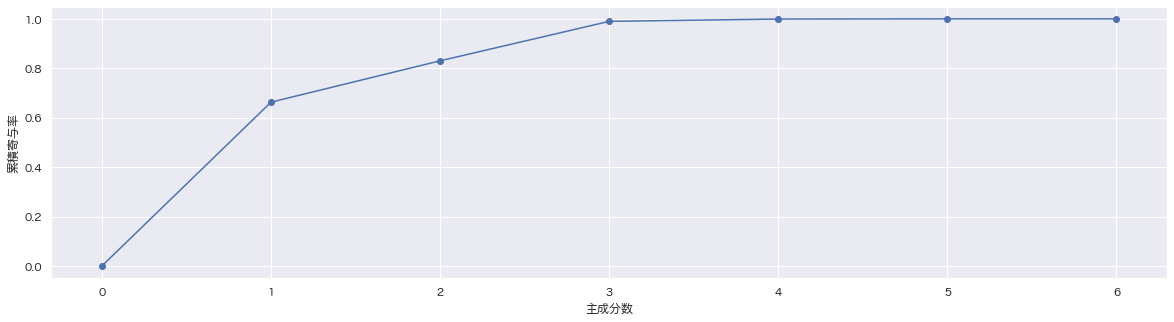

,寄与率
PC_原単価,0.663
PC_売単価,0.167
PC_売上単価,0.16
PC_販売金額,0.009
PC_数量,0.001
PC_値引,0.0


In [45]:
contribution = contribute_rate(standard_u, pca)
contribution

因子分析
固有値
プロット


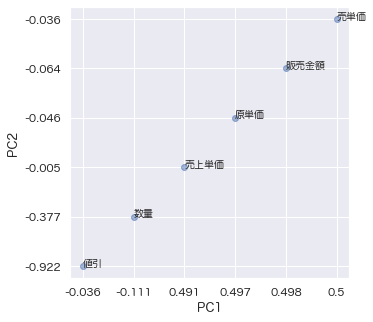

,第一主成分,第ニ主成分,カラム名
1,0.5,-0.036,売単価
3,0.498,-0.064,販売金額
0,0.497,-0.046,原単価
2,0.491,-0.005,売上単価
4,-0.111,-0.377,数量
5,-0.036,-0.922,値引


In [46]:
factor = factor_analysis(standard_u, pca)
factor.sort_values(by='第一主成分', ascending=False)

In [47]:
df_eigen, df_eigen_vector = eigenvalue(standard_u, pca)
df_eigen.head(6)
df_eigen_vector.head(6);

PCA の固有値
PCA の固有ベクトル


### 考察

原単価、売単価までで、寄与率８０％。商品単価の影響が大きい。  
原単価、売単価の固有値が１以上あり、元データとの関わりが大きそう。  

# 特徴量の考察

In [48]:
consideration= day_week.copy()
consideration = consideration.drop(columns='Unnamed: 0', axis=0)
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["font.size"] = 10

## 集計と傾向

### 目的変数の集計

月別の合計数をプロット
時間項目を4桁の固定長に変換


100%|██████████| 394882/394882 [00:06<00:00, 56799.16it/s]


日付時間をインデックスに設定


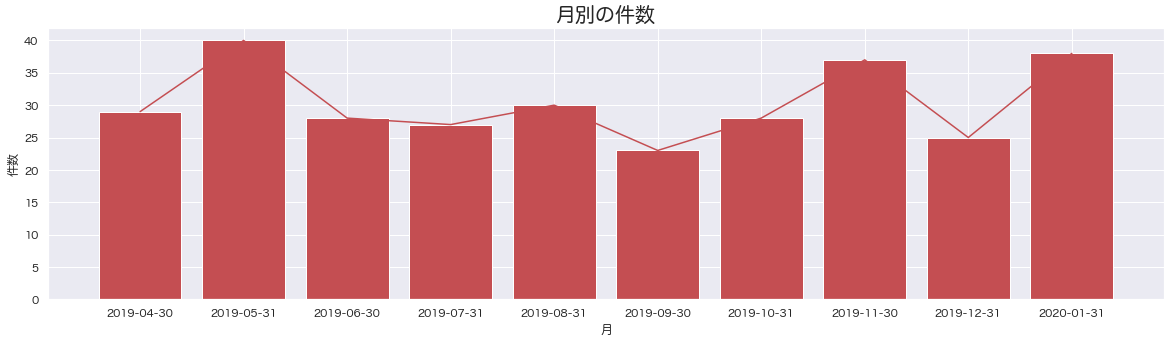

In [49]:
print("月別の合計数をプロット")
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["font.size"] = 10

time_series = day_week.copy()
print("時間項目を4桁の固定長に変換")
time_series['日付'] = time_series['日付'].astype(int).astype(str)
time_series['時間'] = time_series['時間'].astype(int).astype(str)
list = []
for index in tqdm(time_series.index):
    if (len(time_series['時間'][index])<4):
        list.append(time_series['時間'][index].zfill(4))
    else:
        list.append(time_series['時間'][index])
time_series['時間'] = list

print("日付時間をインデックスに設定")
time_series["日付時間"] = pd.to_datetime( (time_series['日付'].astype(str)).str.cat([(time_series['時間'].astype(str))], sep=' ') )
time_series = time_series.set_index('日付時間').sort_index(ascending=True)

month_target = time_series.resample('M')['購入フラグ'].sum()
month_all = time_series.resample('M')['購入フラグ'].count()

x1 = month_target.index.astype(str)
y1 = month_target.values
x2 = month_all.index.astype(str)
y2 = month_all.values
plt.grid()
plt.title('月別の件数', fontsize=20)
plt.xlabel('月')
plt.ylabel('件数')
plt.plot(x1, y1, color='r')
plt.bar(x1, y1, color='r');

負例


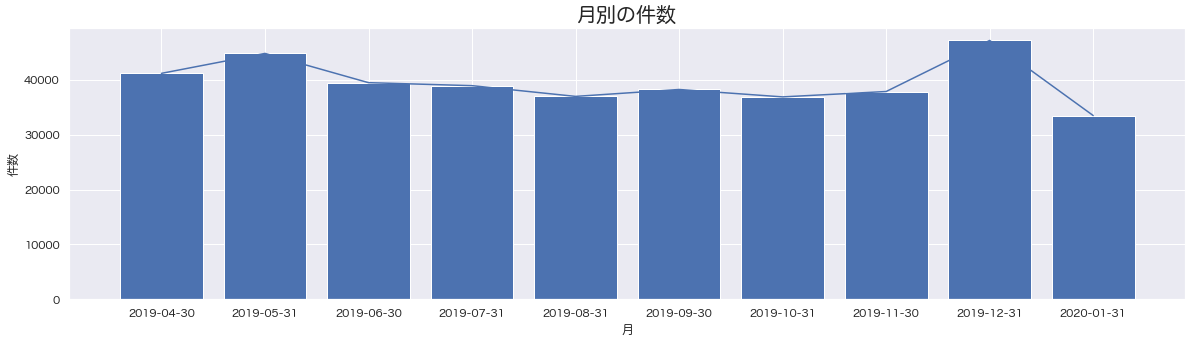

In [50]:
print("負例")
plt.grid()
plt.title('月別の件数', fontsize=20)
plt.xlabel('月')
plt.ylabel('件数')
plt.bar(x2, y2, color='b')
plt.plot(x2, y2, color='b');

## 重要度

### XGBoost

In [51]:
print('XGBoostライブラリ')
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, log_loss

XGBoostライブラリ


In [56]:
print('XGBoost学習用関数')
def xgb_training():

    X = consideration.drop(columns='購入フラグ')
    y = consideration['購入フラグ']
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
    dtrain = xgb.DMatrix(train_X, label=train_y)
    dtest = xgb.DMatrix(test_X, label=test_y)

    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
    }
    evals = [(dtrain, 'train'), (dtest, 'eval')]
    evals_result = {}

    xgb_model = xgb.train(
                        xgb_params,
                        dtrain,
                        num_boost_round=100,
                        evals=evals,
                        evals_result=evals_result,
                        )
    xgb_predict = xgb_model.predict(dtest)
    xgb_pred = np.where(xgb_predict > 0.5, '1', '0')
    acc = accuracy_score(test_y, xgb_pred)
    print('Accuracy:', acc)
    
    return xgb_model

XGBoost学習用関数


In [57]:
print('XGBoost')
consideration = consideration.astype(float)
xgb_model = xgb_training();

XGBoost
[0]	train-logloss:0.43804	eval-logloss:0.43811
[1]	train-logloss:0.29730	eval-logloss:0.29721
[2]	train-logloss:0.20850	eval-logloss:0.20848
[3]	train-logloss:0.14906	eval-logloss:0.14908
[4]	train-logloss:0.10792	eval-logloss:0.10798
[5]	train-logloss:0.07890	eval-logloss:0.07898
[6]	train-logloss:0.05811	eval-logloss:0.05821
[7]	train-logloss:0.04304	eval-logloss:0.04319
[8]	train-logloss:0.03212	eval-logloss:0.03227
[9]	train-logloss:0.02415	eval-logloss:0.02429
[10]	train-logloss:0.01824	eval-logloss:0.01839
[11]	train-logloss:0.01393	eval-logloss:0.01413
[12]	train-logloss:0.01070	eval-logloss:0.01094
[13]	train-logloss:0.00834	eval-logloss:0.00857
[14]	train-logloss:0.00662	eval-logloss:0.00685
[15]	train-logloss:0.00534	eval-logloss:0.00557
[16]	train-logloss:0.00441	eval-logloss:0.00464
[17]	train-logloss:0.00371	eval-logloss:0.00395
[18]	train-logloss:0.00319	eval-logloss:0.00347
[19]	train-logloss:0.00279	eval-logloss:0.00312
[20]	train-logloss:0.00240	eval-logloss:0.

/Users/Tatsuro-Tokume/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:208: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


重要度


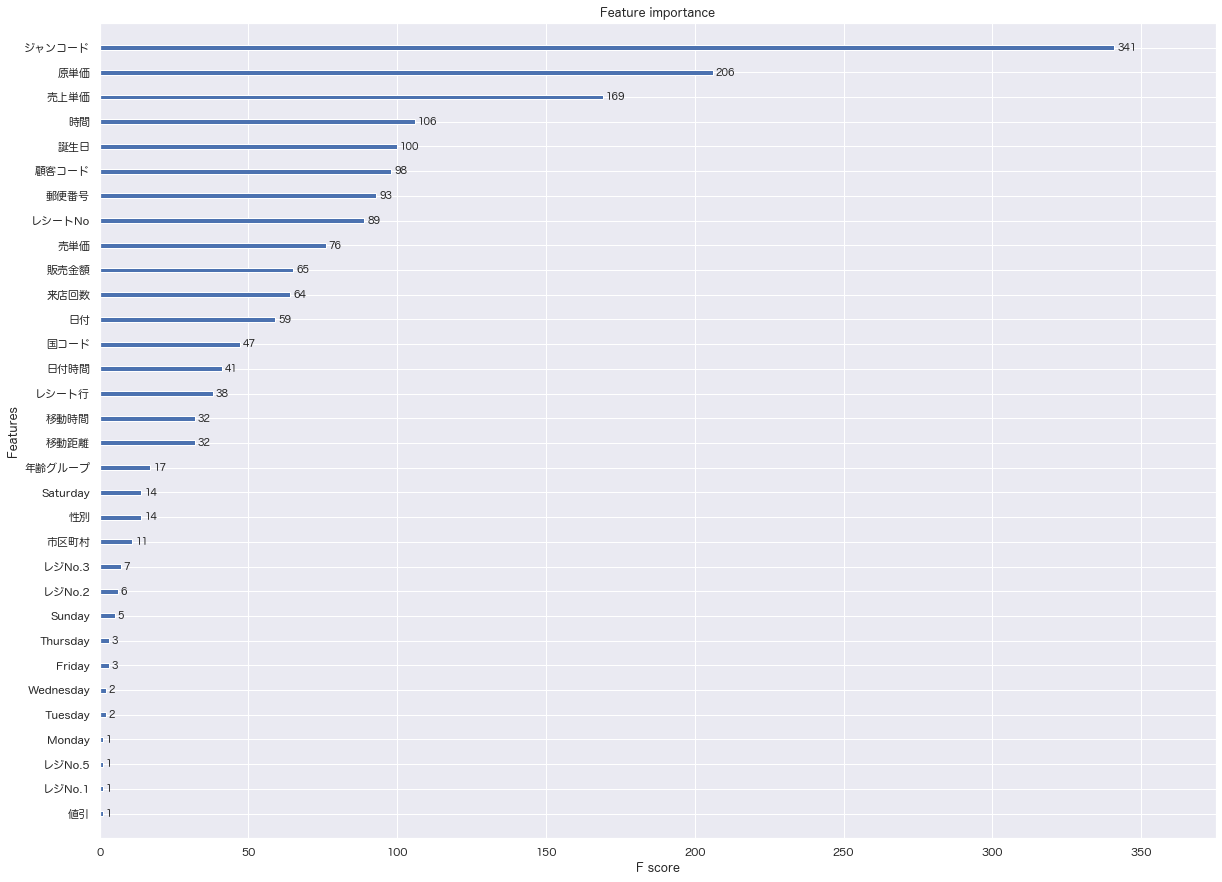

In [58]:
print('重要度')
plt.rcParams["figure.figsize"] = [20,15]
plt.rcParams["font.size"] = 10
xgb.plot_importance(xgb_model);

変数の設定
集計
対象項目の設定
描画


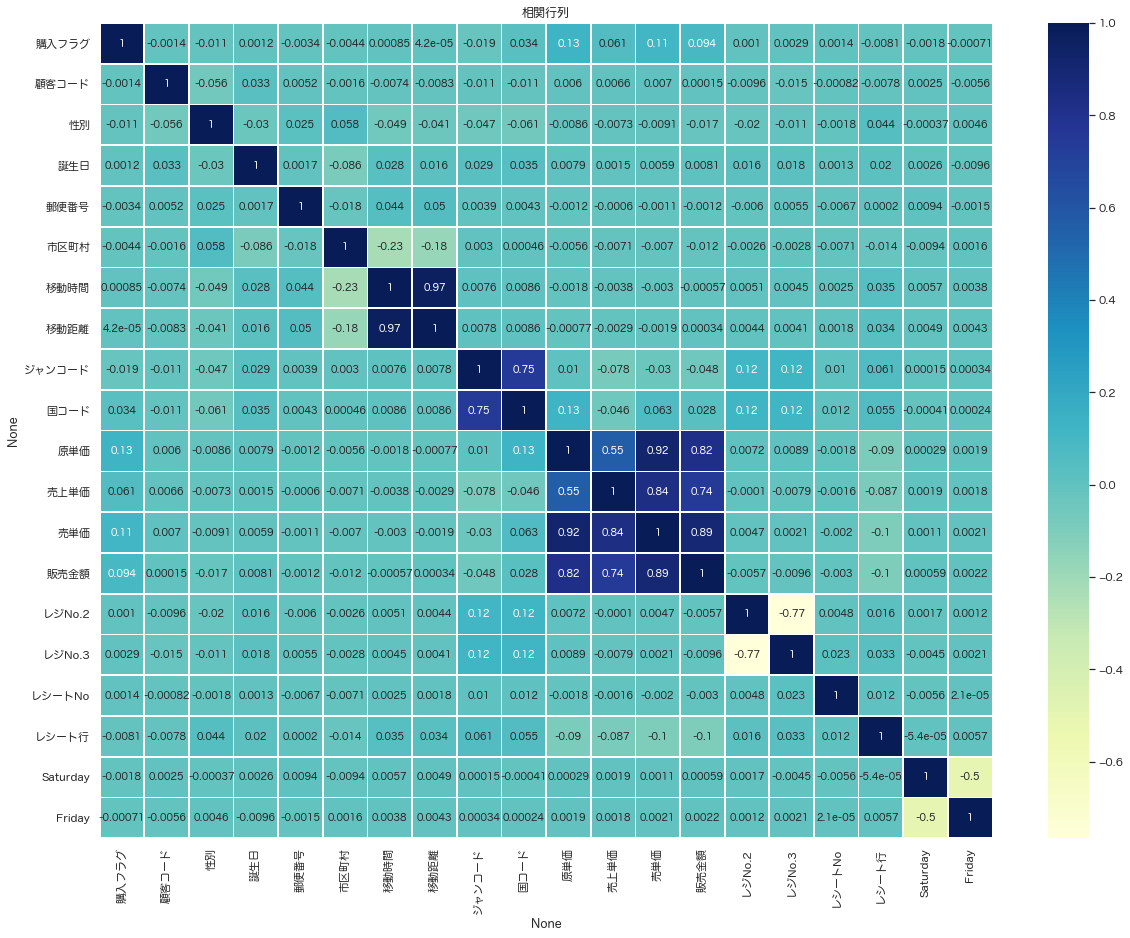

In [59]:
import statsmodels.api as sm
corr = time_series.copy()

print('変数の設定')
corr1=corr['購入フラグ']
corr2=corr['顧客コード']
corr3=corr['性別']
corr4=corr['誕生日']
corr5=corr['郵便番号']
corr6=corr['市区町村']
corr7=corr['移動時間']
corr8=corr['移動距離']
corr9=corr['ジャンコード']
corr10=corr['国コード']
corr11=corr['原単価']
corr12=corr['売上単価']
corr13=corr['売単価']
corr14=corr['販売金額']
corr15=corr['レジNo.2']
corr16=corr['レジNo.3']
corr17=corr['レシートNo']
corr18=corr['レシート行']
corr19=corr['Saturday']
corr20=corr['Friday']

print('集計')
resid_mat = pd.DataFrame()
for ts in[corr1, corr2, corr3, corr4, corr5, corr6, corr7, corr8, corr9, corr10, 
          corr11, corr12, corr13, corr14, corr15, corr16, corr17, corr18, corr19, corr20]:
    res = sm.tsa.seasonal_decompose(ts, period=90)
    resid_mat = pd.concat([resid_mat, pd.Series(res.resid)], axis=1)

print('対象項目の設定')
resid_mat.columns =[['購入フラグ', '顧客コード', '性別', '誕生日', '郵便番号', '市区町村', 
                     '移動時間', '移動距離','ジャンコード', '国コード', '原単価', '売上単価', '売単価', '販売金額', 
                     'レジNo.2', 'レジNo.3', 'レシートNo', 'レシート行', 'Saturday', 'Friday']]

print('描画')
sns.heatmap(resid_mat.corr(), annot=True, lw=0.7, cmap='YlGnBu')
plt.title('相関行列');

### 上位3件をプロット

In [60]:
print("表示サイズの再調整")
plt.rcParams["figure.figsize"] = [20,5]
plt.rcParams["font.size"] = 10

表示サイズの再調整


#### ジャンコード

/Users/Tatsuro-Tokume/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


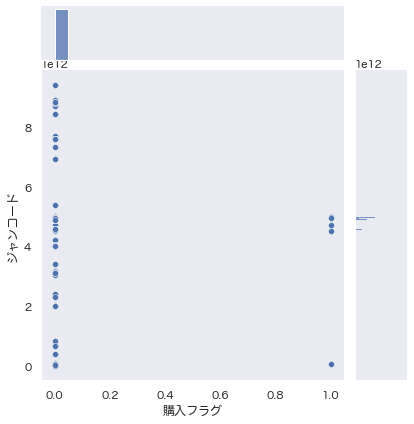

In [61]:
sns.jointplot('購入フラグ', 'ジャンコード', data=consideration);

#### 原単価

In [ ]:
sns.jointplot('購入フラグ', '原単価', data=consideration);

#### 売上単価

In [ ]:
x = '購入フラグ'
y = '売上単価'
data=consideration
sns.jointplot(x, y, data);

## 変数単体のAUC

モデリング側で評価する

## 各特徴量の考察結果

モデリング側で考察する

## モデリング用データの保存

In [ ]:
print('モデリングシートにデータを引き継ぐ')
considerationed= day_week.copy()
considerationed = considerationed.drop(columns='Unnamed: 0', axis=0)
considerationed.to_csv("./considerationed.csv", encoding="UTF-8", header=True, index=True);